In [1]:
import numpy
import skfuzzy
import matplotlib.pyplot as plt
from skfuzzy import control

In [2]:
#Antecedents (inputs)
cough_severity = skfuzzy.control.Antecedent(numpy.arange(0, 101, 1), 'cough_severity')
fever_severity = skfuzzy.control.Antecedent(numpy.arange(0, 101, 1), 'fever_severity')
breathing_severity = skfuzzy.control.Antecedent(numpy.arange(0, 101, 1), 'breathing_severity')
comorbidities_severity = skfuzzy.control.Antecedent(numpy.arange(0, 6, 1), 'comorbidities_severity')
riskfactors_severity = skfuzzy.control.Antecedent(numpy.arange(0, 6, 1), 'riskfactors_severity')
age_severity = skfuzzy.control.Antecedent(numpy.arange(0, 101, 1), 'age_severity')

#Consequents (outputs)
priority = skfuzzy.control.Consequent(numpy.arange(0, 101, 1), 'priority')

d:\programs\code\python\cfn-covid-19\program\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


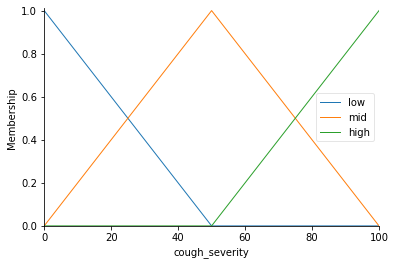

In [3]:
cough_severity.automf(names=['low', 'mid', 'high'])

cough_severity.view()

d:\programs\code\python\cfn-covid-19\program\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


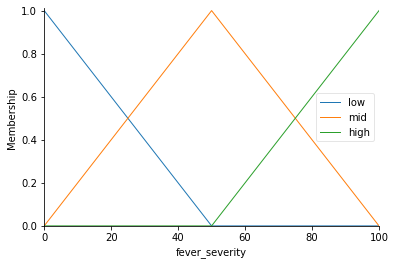

In [4]:
fever_severity.automf(names=['low', 'mid', 'high'])

fever_severity.view()

d:\programs\code\python\cfn-covid-19\program\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


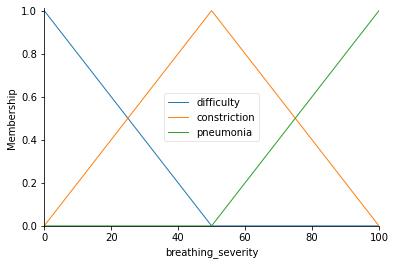

In [5]:
breathing_severity.automf(names=['difficulty', 'constriction', 'pneumonia'])

breathing_severity.view()

d:\programs\code\python\cfn-covid-19\program\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


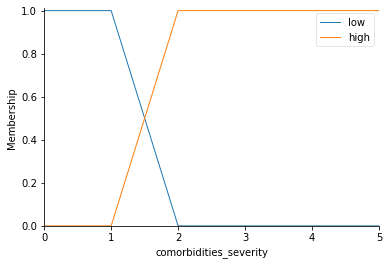

In [6]:
#List of Comorbidities: Hypertension, Diabetes, Bronchitis, Coronary Issues, Chest/Muscle Pain, Immune Deficiency

comorbidities_severity['low'] = skfuzzy.trapmf(comorbidities_severity.universe, [0, 0, 1, 2])
comorbidities_severity['high'] = skfuzzy.trapmf(comorbidities_severity.universe, [1, 2, 5, 5])

comorbidities_severity.view()

d:\programs\code\python\cfn-covid-19\program\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


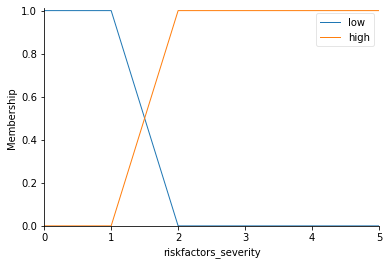

In [7]:
#List of Risk Factors: Very Young/Old, Smoker, Polluted Air, Fatigue, Recent Exposure

riskfactors_severity['low'] = skfuzzy.trapmf(riskfactors_severity.universe, [0, 0, 1, 2])
riskfactors_severity['high'] = skfuzzy.trapmf(riskfactors_severity.universe, [1, 2, 5, 5])

riskfactors_severity.view()

d:\programs\code\python\cfn-covid-19\program\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


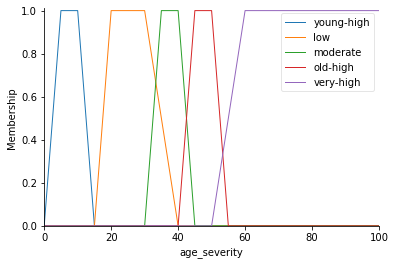

In [8]:
age_severity['young-high'] = skfuzzy.trapmf(age_severity.universe, [0, 5, 10, 15])
age_severity['low'] = skfuzzy.trapmf(age_severity.universe, [15, 20, 30, 40])
age_severity['moderate'] = skfuzzy.trapmf(age_severity.universe, [30, 35, 40, 45])
age_severity['old-high'] = skfuzzy.trapmf(age_severity.universe, [40, 45, 50, 55])
age_severity['very-high'] = skfuzzy.trapmf(age_severity.universe, [50, 60, 100, 100])

age_severity.view()

d:\programs\code\python\cfn-covid-19\program\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


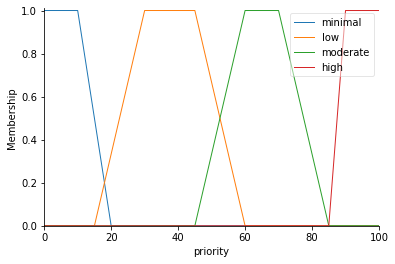

In [9]:
priority['minimal'] = skfuzzy.trapmf(priority.universe, [0, 0, 10, 20])
priority['low'] = skfuzzy.trapmf(priority.universe, [15, 30, 45, 60])
priority['moderate'] = skfuzzy.trapmf(priority.universe, [45, 60, 70, 85])
priority['high'] = skfuzzy.trapmf(priority.universe, [85, 90, 100, 100])

priority.view()

In [10]:
rule1 = skfuzzy.control.Rule(cough_severity['low'] | fever_severity['low'] | age_severity['low'] | age_severity['moderate'],
                             priority['minimal'])

rule2 = skfuzzy.control.Rule(cough_severity['mid'] | fever_severity['mid'] | breathing_severity['difficulty'],
                             priority['low'])

rule3 = skfuzzy.control.Rule(cough_severity['high'] | fever_severity['high'] | breathing_severity['constriction'],
                             priority['moderate'])

rule4 = skfuzzy.control.Rule(comorbidities_severity['high'] | fever_severity['high'] | breathing_severity['constriction'],
                             priority['high'])

rule5 = skfuzzy.control.Rule(age_severity['young-high'],
                             priority['moderate'])

rule6 = skfuzzy.control.Rule(riskfactors_severity['high'] | age_severity['moderate'] | age_severity['old-high'],
                             priority['high'])

rule7 = skfuzzy.control.Rule(age_severity['very-high'] | fever_severity['high'] | breathing_severity['constriction'],
                             priority['high'])

rule8 = skfuzzy.control.Rule(breathing_severity['pneumonia'],
                             priority['high'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x18755ed0>)

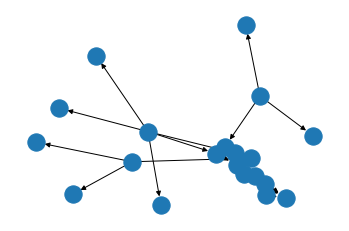

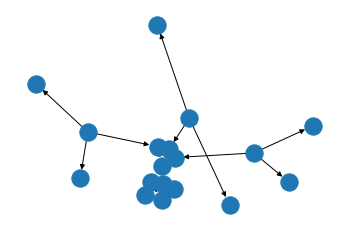

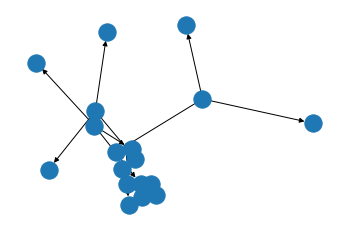

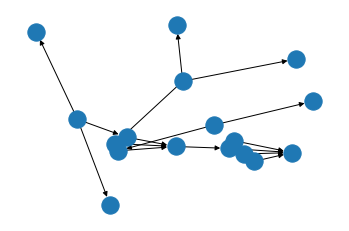

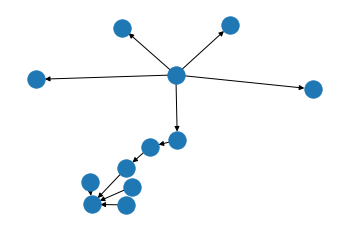

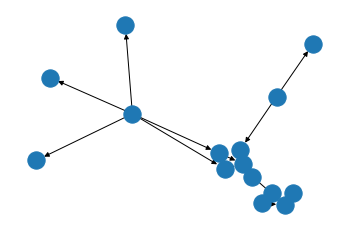

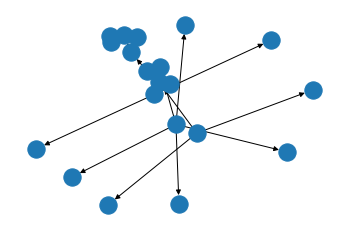

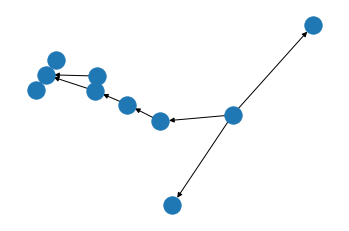

In [11]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()

In [12]:
priority_ctrl = skfuzzy.control.ControlSystem([rule1, rule2, rule3, rule4,
                                               rule5, rule6, rule7, rule8])

prioritizing = skfuzzy.control.ControlSystemSimulation(priority_ctrl)

In [13]:
# Cough, Fever, Breathing and Age are inputs between 1 and 100
# Risk and Comorbidities are inputs between 0 and 6

cough_input = int(input())
fever_input = int(input())
breathing_input = int(input())
comorbidities_input = int(input())
riskfactors_input = int(input())
age_input = int(input())

prioritizing.input['cough_severity'] = cough_input
prioritizing.input['fever_severity'] = fever_input
prioritizing.input['breathing_severity'] = breathing_input
prioritizing.input['comorbidities_severity'] = comorbidities_input
prioritizing.input['riskfactors_severity'] = riskfactors_input
prioritizing.input['age_severity'] = age_input

prioritizing.compute()

print(prioritizing.output['priority'])

# priority.view(sim=prioritizing)
# plt.show()


ValueError: invalid literal for int() with base 10: ''